<a href="https://colab.research.google.com/github/JairAlberto3945/JairAlberto3945/blob/main/Metodo_Aceptaci%C3%B3n_y_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Huerta Díaz Jair Alberto

Método de Aceptación y rechazo para la distribución Triangular

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

In [5]:
# Parámetros
a = 1
b = 3
c = 5
n = 10000

# Función de densidad triangular
def triangular_pdf(x, a, b, c):
    if x < a or x > c:
        return 0
    elif a <= x < b:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif b <= x <= c:
        return 2 * (c - x) / ((c - b) * (c - a))

# Obtener el valor máximo de la densidad para M
M = triangular_pdf(b, a, b, c)

# Aceptación y rechazo
samples = []
while len(samples) < n:
    x = np.random.uniform(a, c)
    u = np.random.uniform(0, 1)
    if u <= triangular_pdf(x, a, b, c) / M:
        samples.append(x)

samples = np.array(samples)

In [6]:
# Estadísticas simuladas
media_simulada = np.mean(samples)
std_simulada = np.std(samples)

# Estadísticas teóricas
media_teorica = (a + b + c) / 3
var_teorica = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18
std_teorica = np.sqrt(var_teorica)

# Imprimir resultados
print("Media simulada:", media_simulada)
print("Media teórica:", media_teorica)
print("Desviación estándar simulada:", std_simulada)
print("Desviación estándar teórica:", std_teorica)

Media simulada: 2.994621632456164
Media teórica: 3.0
Desviación estándar simulada: 0.8216695582469067
Desviación estándar teórica: 0.816496580927726


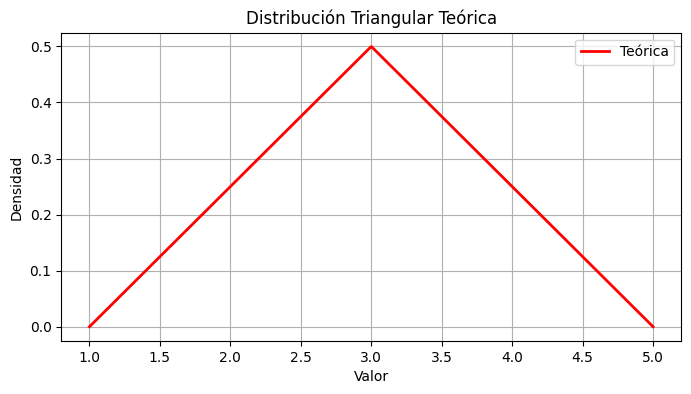

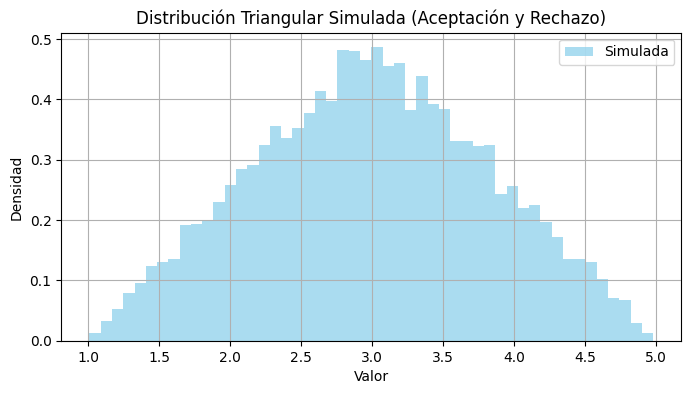

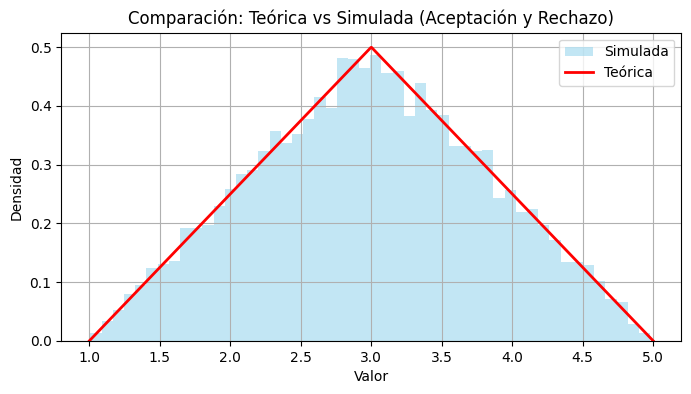

In [7]:
# Curva teórica
x_vals = np.linspace(a, c, 1000)
rv = triang(c=(b - a) / (c - a), loc=a, scale=c - a)
y_teorica = rv.pdf(x_vals)

# Gráfica 1: Distribución teórica
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_teorica, 'r-', lw=2, label='Teórica')
plt.title("Distribución Triangular Teórica")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 2: Distribución generada
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', label='Simulada')
plt.title("Distribución Triangular Simulada (Aceptación y Rechazo)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 3: Ambas distribuciones
plt.figure(figsize=(8, 4))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='skyblue', label='Simulada')
plt.plot(x_vals, y_teorica, 'r-', lw=2, label='Teórica')
plt.title("Comparación: Teórica vs Simulada (Aceptación y Rechazo)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()
